In [43]:
import pandas as pd
import pylab as plt
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score


In [44]:
data = pd.read_csv(r'C:\Users\mahdi\Desktop\Github\Cancer_Classification_Model\cleaned_data.csv')
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [45]:
y = data['diagnosis']
X = data.drop(['diagnosis'], axis=1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 123)

In [47]:
from xgboost import XGBClassifier
n_estimators=5
random_state=0
objective='binary:logistic'
learning_rate=0.1
model =XGBClassifier(objective=objective,learning_rate=learning_rate,n_estimators=n_estimators,eval_metric='mlogloss')
model 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None,
              num_parallel_tree=None, ...)

In [48]:
print("learning rate:", model.learning_rate)
print("lobjective:", model.objective)
print("n_estimators:", model.n_estimators)

learning rate: 0.1
lobjective: binary:logistic
n_estimators: 5


In [49]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred 

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0])

In [50]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [51]:
evaluate_metrics(y_test, y_pred)

{'accuracy': 0.9473684210526315,
 'recall': 0.9285714285714286,
 'precision': 0.9285714285714286,
 'f1score': 0.9285714285714286}

In [52]:
learning_rate=0.3
model =XGBClassifier(objective=objective,learning_rate=learning_rate,n_estimators=n_estimators)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate_metrics(y_test, y_pred)

{'accuracy': 0.9736842105263158,
 'recall': 0.9761904761904762,
 'precision': 0.9534883720930233,
 'f1score': 0.9647058823529412}

In [53]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"train Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

def get_accuracy_boost(X,y,title,times=20,xlabel='Number Estimators',Learning_rate_=[0.2,0.4,0.6,1], n_est = 100):

    lines_array=['solid','--', '-.', ':']

    N_estimators=[n*2 for n in range(1,n_est//2)]
    
    train_acc=np.zeros((times,len(Learning_rate_),len(N_estimators)))
    test_acc=np.zeros((times,len(Learning_rate_),len(N_estimators)))



    
    for n in tqdm(range(times)):
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
        for n_estimators in N_estimators:
            for j,lr in enumerate(Learning_rate_):


                model = XGBClassifier(objective=objective,learning_rate=lr,n_estimators=n_estimators,eval_metric='mlogloss')


                model.fit(X_train,y_train)



                Accuracy=get_accuracy(X_train, X_test, y_train, y_test,  model)



                train_acc[n,j,(n_estimators//2)-1]=Accuracy['train Accuracy']
                test_acc[n,j,(n_estimators//2)-1]=Accuracy['test Accuracy']
    



    fig, ax1 = plt.subplots()
    mean_test=test_acc.mean(axis=0)
    mean_train=train_acc.mean(axis=0)
    ax2 = ax1.twinx()

    for j,(lr,line) in enumerate(zip(Learning_rate_,lines_array)): 

        ax1.plot(mean_train[j,:],linestyle = line,color='b',label="Learning rate "+str(lr))
        ax2.plot(mean_test[j,:],linestyle = line, color='r',label=str(lr))

    ax1.set_ylabel('Training accuracy',color='b')
    ax1.legend()
    ax2.set_ylabel('Testing accuracy', color='r')
    ax2.legend()
    ax1.set_xlabel(xlabel)
    plt.show()

100%|██████████| 10/10 [00:03<00:00,  3.18it/s]


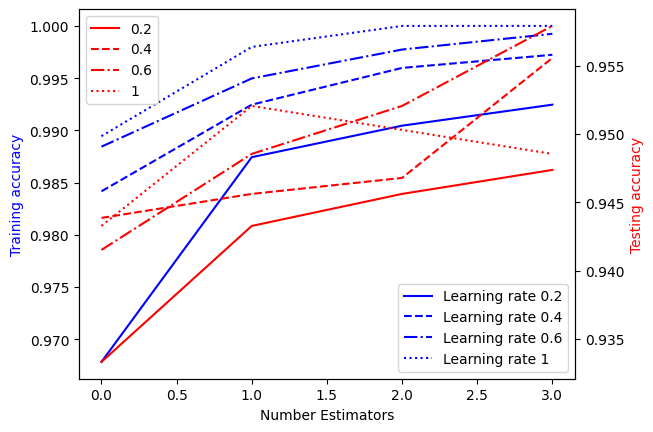

In [54]:
get_accuracy_boost(X,y,title="Training and Test Accuracy vs Weak Classifiers",times=10,xlabel='Number Estimators', n_est = 10)

In [55]:
objective='binary:logistic'
learning_rate=0.3
n_estimators=10
model =XGBClassifier(objective=objective,learning_rate=learning_rate,n_estimators=n_estimators,eval_metric='mlogloss')
model.fit(X_train, y_train)
evaluate_metrics(y_test, y_pred)

{'accuracy': 0.9736842105263158,
 'recall': 0.9761904761904762,
 'precision': 0.9534883720930233,
 'f1score': 0.9647058823529412}

In [56]:
max_depth=3

In [57]:
model =XGBClassifier(objective=objective,learning_rate=learning_rate,n_estimators=n_estimators,eval_metric='mlogloss',max_depth=max_depth)
model.fit(X_train, y_train)
evaluate_metrics(y_test, y_pred)

{'accuracy': 0.9736842105263158,
 'recall': 0.9761904761904762,
 'precision': 0.9534883720930233,
 'f1score': 0.9647058823529412}

In [58]:
min_child_weight=4

In [59]:
model =XGBClassifier(objective=objective,learning_rate=learning_rate,n_estimators=n_estimators,eval_metric='mlogloss',min_child_weight=4)
model.fit(X_train, y_train)
evaluate_metrics(y_test, y_pred)

{'accuracy': 0.9736842105263158,
 'recall': 0.9761904761904762,
 'precision': 0.9534883720930233,
 'f1score': 0.9647058823529412}

In [72]:
gamma=0.01
reg_lambda=4444444
alpha=1
model =XGBClassifier(objective=objective,learning_rate=learning_rate,n_estimators=n_estimators,eval_metric='mlogloss',gamma=gamma,reg_lambda=reg_lambda,alpha=alpha)
model.fit(X_train, y_train)
evaluate_metrics(y_test, y_pred)

{'accuracy': 0.9736842105263158,
 'recall': 0.9761904761904762,
 'precision': 0.9534883720930233,
 'f1score': 0.9647058823529412}

In [73]:
model = XGBClassifier(eval_metric='logloss') 
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train,  eval_set=eval_set,verbose=False)
y_pred = model.predict(X_test)
evaluate_metrics(y_test, y_pred)

{'accuracy': 0.9736842105263158,
 'recall': 0.9761904761904762,
 'precision': 0.9534883720930233,
 'f1score': 0.9647058823529412}

### GridSearch

In [74]:
model = XGBClassifier(objective='binary:logistic', eval_metric='logloss')
param_grid = {'learning_rate': [0.1*(n+1) for n in range(5)],
             'n_estimators' : [2*n+1 for n in range(5)]}

param_grid 

search = GridSearchCV(estimator=model, param_grid=param_grid,scoring="neg_log_loss")
search.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.30000000000000004, 0.4,
                                           0.5],
                         'n_estimators': [1, 3, 5, 7, 9]},
             scoring='neg_log_loss')

In [75]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(estimator=model, param_grid=param_grid,scoring="neg_log_loss")
search.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.30000000000000004, 0.4,
                                           0.5],
                         'n_estimators': [1, 3, 5, 7, 9]},
             scoring='neg_log_loss')

In [64]:
search.best_score_

np.float64(-0.12380263144364405)

In [65]:
search.best_params_

{'learning_rate': 0.4, 'n_estimators': 9}

In [76]:
evaluate_metrics(y_test, y_pred)

{'accuracy': 0.9736842105263158,
 'recall': 0.9761904761904762,
 'precision': 0.9534883720930233,
 'f1score': 0.9647058823529412}

In [67]:
from imblearn.over_sampling import  SMOTE
smote_sampler = SMOTE(random_state = 123)
X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)
optimized_model = XGBClassifier(objective='binary:logistic', learning_rate=0.3, n_estimators=10, eval_metric='mlogloss', max_depth=3, min_child_weight=4, gamma=1, reg_lambda=2, alpha=1)
optimized_model.fit(X_smo, y_smo)
preds = optimized_model.predict(X_test)

In [68]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

precision_test, recall_test, f_beta_test, _ = precision_recall_fscore_support(y_test, preds, beta=5, pos_label=1, average='binary')
accuracy_test = accuracy_score(y_test, preds)
train_preds = optimized_model.predict(X_train)
precision_train, recall_train, f_beta_train, _ = precision_recall_fscore_support(y_train, train_preds, beta=5, pos_label=1, average='binary')
accuracy_train = accuracy_score(y_train, train_preds)


print("Test Set Results:")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Precision: {precision_test:.2f}")
print(f"Recall: {recall_test:.2f}")
print(f"F-Score: {f_beta_test:.2f}")


print("\nTraining Set Results:")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"Precision: {precision_train:.2f}")
print(f"Recall: {recall_train:.2f}")
print(f"F-Score: {f_beta_train:.2f}")

Test Set Results:
Accuracy: 0.96
Precision: 0.91
Recall: 0.98
F-Score: 0.97

Training Set Results:
Accuracy: 0.99
Precision: 0.98
Recall: 0.98
F-Score: 0.98
